In [1]:
pip install icon_registration==0.3.3

     |████████████████████████████████| 44 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 16.6 MB 912 kB/s eta 0:00:01
     |████████████████████████████████| 54.5 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 95.2 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.0 MB 900 kB/s eta 0:00:01
     |████████████████████████████████| 70.5 MB 542 kB/s eta 0:00:01     |█████████████████████▎          | 47.0 MB 848 kB/s eta 0:00:28     |████████████████████████████████| 70.5 MB 206 kB/s 
     |████████████████████████████████| 20.2 MB 1.5 MB/s eta 0:00:01
  Created wheel for girder-client: filename=girder_client-3.1.12-py3-none-any.whl size=21194 sha256=946bcce3c7a4e73ad9d072c5af364cd32de1cea9d8169f7f15d8bd7455a129cf
  Stored in directory: /home/ql/.cache/pip/wheels/d9/30/80/c9bd5baf0d5d8cf89928774504fb83921f026f248595708f31
Successfully built girder-client
Note: you may need 

In [2]:
# Download some sample images with different sizes, directions, and pixel spacings
!girder-client --api-url https://data.kitware.com/api/v1 localsync 61d3adf64acac99f4292ad6c .

Local metadata does not exists. Falling back to download.
[####################################]  29.88M/29.88M  100%  9126260_20060921_SAG_3D_DESS_LEFT_11309302_image.nii.gz            
[####################################]  12.06M/12.06M  100%  9126260_20060921_SAG_3D_DESS_RIGHT_11309309_image.nii.gz            
[####################################]  29.16M/29.16M  100%  9225063_20090413_SAG_3D_DESS_RIGHT_12784112_image.nii.gz            
[####################################]  28.98M/28.98M  100%  9400975_20090427_SAG_3D_DESS_RIGHT_12802512_image.nii.gz            
[####################################]  32.89M/32.89M  100%  9487462_20081003_SAG_3D_DESS_RIGHT_11495603_image.nii.gz            
[####################################]  26.92M/26.92M  100%  9712762_20090420_SAG_3D_DESS_RIGHT_12583306_image.nii.gz            


In [3]:
import icon_registration.itk_wrapper as itk_wrapper
import icon_registration.pretrained_models as pretrained_models
import itk
import matplotlib.pyplot as plt
model = pretrained_models.OAI_knees_gradICON_model()

In [15]:
import os
import SimpleITK as sitk
import numpy as np

train_folder = './'
train_image = os.path.join(train_folder, '9486952_image.nii.gz')
train_label = os.path.join(train_folder, '9486952_label.nii.gz')

test_folder = './'
test_image = os.path.join(test_folder, '9933836_image.nii.gz')
test_label = os.path.join(test_folder, '9933836_label.nii.gz')


def normalize(image_npy):
    # normalization (in-place)
    max_val = np.percentile(image_npy, 99)
    min_val = np.percentile(image_npy, 1)
    image_npy[image_npy > max_val] = max_val
    image_npy[image_npy < min_val] = min_val
    image_npy = (image_npy - min_val) / max_val
    return image_npy

image_a = itk.imread(train_image)
image_a = image_a.astype(np.float32)
image_a_npy = itk.array_from_image(image_a)
image_a_npy = normalize(image_a_npy)
print(image_a_npy.max(), image_a_npy.min())
image_a = itk.image_from_array(image_a_npy)

image_b = itk.imread(test_image)
image_b = image_b.astype(np.float32)
image_b_npy = itk.array_from_image(image_b)
image_b_npy = normalize(image_b_npy)
print(image_b_npy.max(), image_b_npy.min())
image_b = itk.image_from_array(image_b_npy)

# image_a = itk.imread("9487462_20081003_SAG_3D_DESS_RIGHT_11495603_image.nii.gz")
# image_b = itk.imread("9225063_20090413_SAG_3D_DESS_RIGHT_12784112_image.nii.gz")

phi_ab, phi_ba = itk_wrapper.register_pair(model, image_a, image_b)


1.0 0.0
1.0 0.0


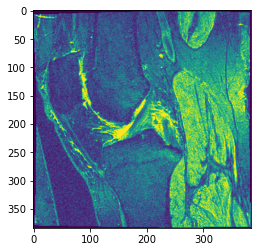

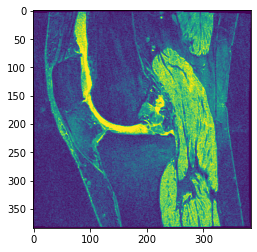

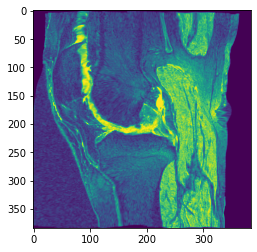

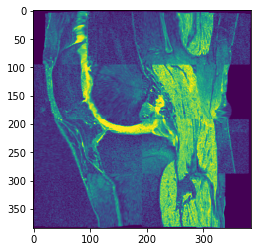

In [20]:
interpolator = itk.LinearInterpolateImageFunction.New(image_a)
warped_image_a = itk.resample_image_filter(image_a, 
    transform=phi_ab, 
    interpolator=interpolator,
    size=itk.size(image_b),
    output_spacing=itk.spacing(image_b),
    output_direction=image_b.GetDirection(),
    output_origin=image_b.GetOrigin()
)
plt.imshow(image_a[80])
plt.show()
plt.imshow(image_b[80])
plt.show()

plt.imshow(warped_image_a[80])
plt.show()

plt.imshow(itk.checker_board_image_filter(warped_image_a, image_b)[80])
plt.show()


CompositeTransform (0x559b7d6f0780)
  RTTI typeinfo:   itk::CompositeTransform<double, 3u>
  Reference Count: 1
  Modified Time: 1346
  Debug: Off
  Object Name: 
  Observers: 
    none
  Transforms in queue, from begin to end:
  >>>>>>>>>
  MatrixOffsetTransformBase (0x559b7ab81e80)
    RTTI typeinfo:   itk::MatrixOffsetTransformBase<double, 3u, 3u>
    Reference Count: 1
    Modified Time: 1309
    Debug: Off
    Object Name: 
    Observers: 
      none
    Matrix: 
      2 0 0 
      0 2 0 
      0 0 2 
    Offset: [0.5, 0.5, 0.5]
    Center: [95.5, 95.5, 39.5]
    Translation: [96, 96, 40]
    Inverse: 
      0.5 0 0 
      0 0.5 0 
      0 0 0.5 
    Singular: 0
  >>>>>>>>>
  DisplacementFieldTransform (0x559b7ad12e00)
    RTTI typeinfo:   itk::DisplacementFieldTransform<double, 3u>
    Reference Count: 1
    Modified Time: 1279
    Debug: Off
    Object Name: 
    Observers: 
      none
    DisplacementField: 
      Image (0x559b7d6eee80)
        RTTI typeinfo:   itk::Image<itk::

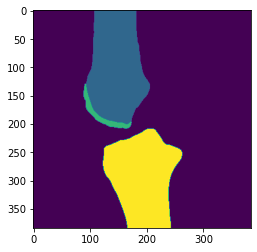

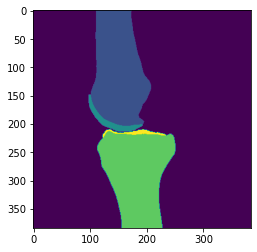

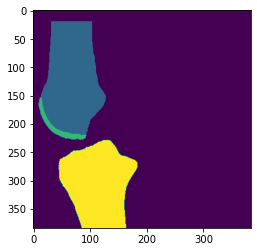

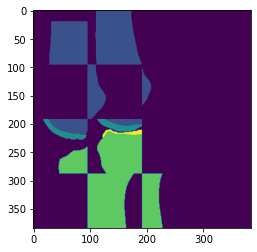

In [23]:
label_a = itk.imread(train_label)
label_b = itk.imread(test_label)

print(phi_ab)
print(phi_ba)

interpolator = itk.NearestNeighborInterpolateImageFunction.New(label_a)
warped_label_a = itk.resample_image_filter(label_a, 
    transform=phi_ab, 
    interpolator=interpolator,
    size=itk.size(label_b),
    output_spacing=itk.spacing(label_b),
    output_direction=label_b.GetDirection(),
    output_origin=label_b.GetOrigin()
)
plt.imshow(label_a[80])
plt.show()
plt.imshow(label_b[80])
plt.show()

plt.imshow(warped_label_a[80])
plt.show()

plt.imshow(itk.checker_board_image_filter(warped_label_a, label_b)[80])
plt.show()
